In [2]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47,13


In [75]:
train.head(20)

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
5,5,4.377769e+10,27776.26,6.02,0.00505,5.472212e+09,0.50,10797026.17,4501083.0,7538720.0,...,0.6223,154000000000000,0.52,1883.0,1,1055.0,4.5550,271.84,0.62,1
6,6,1.282546e+10,6215.45,6.07,0.00040,1.832208e+09,0.35,1509434.16,780135.0,2408.0,...,0.0000,1760000000000,0.26,2.0,0,0.0,5.2293,43.30,0.95,6
7,7,1.583740e+10,17060.72,5.73,0.00275,2.262486e+09,0.49,10151935.50,2262318.0,4887848.0,...,0.4630,7170000000000,0.86,2007.0,1,1113.0,5.5842,137.96,-0.94,3
8,8,5.844890e+10,9878.51,5.51,0.00185,6.494322e+09,0.42,2935716.59,1370456.0,1206.0,...,0.0004,552000000000,0.01,3.0,1,2.0,6.3101,84.18,-0.05,12
9,9,2.329566e+10,25682.32,6.88,0.00030,1.791974e+09,0.27,2445584.89,3319395.0,33620.0,...,0.0003,3090000000000,0.62,6.0,0,4.0,8.7404,108.10,-0.34,1


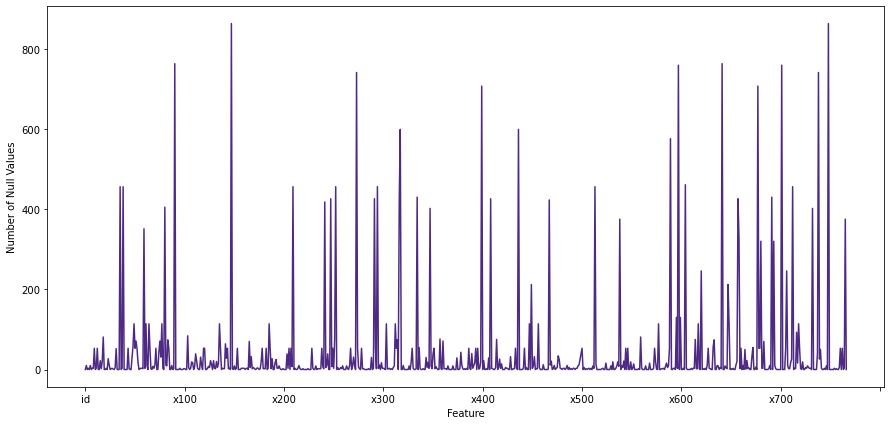

In [6]:
null_counts = train.isnull().sum()
null_counts.plot(kind='line', figsize = (15,7), color = "#4E2A84")
plt.xlabel('Feature')
plt.ylabel('Number of Null Values')
plt.show()

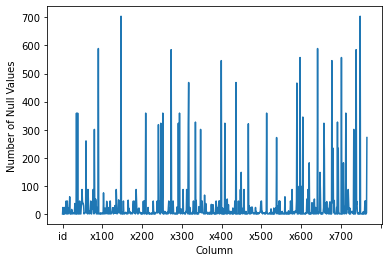

In [8]:
null_counts = test.isnull().sum()
null_counts.plot(kind='line')
plt.xlabel('Column')
plt.ylabel('Number of Null Values')
plt.show()

In [10]:
corr_matrix = train.corr()
corr_matrix

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
id,1.000000,0.014652,-0.001859,0.001691,0.004353,0.024493,0.014469,-0.003433,-0.001495,-0.023534,...,-0.014413,0.009485,0.008319,-0.019056,0.000953,-0.018877,-0.009983,-0.006646,0.001720,-0.018863
x001,0.014652,1.000000,-0.102542,0.153749,0.379679,0.493197,0.247154,-0.165646,-0.103770,-0.032586,...,-0.052222,-0.006532,-0.016382,-0.057818,0.602138,-0.058439,0.629004,-0.149572,-0.005274,0.002661
x002,-0.001859,-0.102542,1.000000,-0.177286,0.035330,-0.180123,0.071401,0.463602,0.961286,0.103345,...,0.058053,0.104158,0.045745,0.102208,-0.007468,0.101158,0.017972,0.819495,-0.022161,-0.065831
x003,0.001691,0.153749,-0.177286,1.000000,-0.066532,-0.052850,-0.113437,-0.500092,-0.197902,-0.179138,...,-0.252394,-0.137534,-0.091690,-0.234049,0.159373,-0.236631,0.204255,-0.500867,-0.005638,0.201294
x004,0.004353,0.379679,0.035330,-0.066532,1.000000,0.231413,0.222151,0.126973,0.075906,0.038667,...,0.082101,0.021076,0.011411,0.044423,0.186038,0.046296,0.225874,0.086455,0.005585,-0.021558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x762,-0.018877,-0.058439,0.101158,-0.236631,0.046296,0.042812,0.098511,0.366232,0.150967,0.942280,...,0.842035,0.227901,0.042165,0.999511,-0.082885,1.000000,-0.101544,0.272372,-0.006575,-0.063036
x763,-0.009983,0.629004,0.017972,0.204255,0.225874,-0.128443,0.226026,-0.154933,-0.019153,-0.085807,...,-0.100417,-0.086515,-0.037527,-0.099358,0.794701,-0.101544,1.000000,-0.141807,-0.032923,0.009145
x764,-0.006646,-0.149572,0.819495,-0.500867,0.086455,-0.025749,0.116250,0.741603,0.853014,0.244453,...,0.250796,0.210006,0.094214,0.269973,-0.133994,0.272372,-0.141807,1.000000,-0.016775,-0.128958
x765,0.001720,-0.005274,-0.022161,-0.005638,0.005585,0.060317,-0.014770,-0.011229,-0.012326,-0.003104,...,-0.002085,-0.001432,-0.032845,-0.006884,-0.017833,-0.006575,-0.032923,-0.016775,1.000000,0.067693


In [11]:
# Sort the correlations into a series

corr_series = corr_matrix.unstack()
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

sorted_corr = corr_series.sort_values(ascending=False)

# Pull perfect correlations

corr_1 = sorted_corr[sorted_corr == 1.0]

In [12]:
# Absolute value correlations
# Pull perfect correlations and those above 0.7

corr_series_abs = corr_series.abs()
sorted_corr_abs = corr_series_abs.sort_values(ascending=False)
corr_1_abs = sorted_corr_abs[sorted_corr_abs == 1.0]
corr_07_abs = sorted_corr_abs[(sorted_corr_abs > 0.7) & (sorted_corr_abs < 1.0)]

In [73]:
corr_04_abs = sorted_corr_abs[(sorted_corr_abs > 0.4) & (sorted_corr_abs < 1.0)]
corr_04_abs

x104  x352    1.000000
x224  x104    1.000000
x352  x104    1.000000
x104  x179    1.000000
      x055    1.000000
                ...   
x094  x202    0.400053
x151  x231    0.400028
x231  x151    0.400028
x335  x079    0.400023
x079  x335    0.400023
Length: 47112, dtype: float64

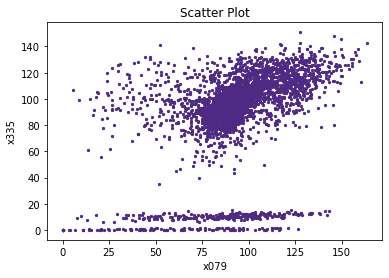

<Figure size 576x432 with 0 Axes>

In [74]:
# Create the scatter plot
plt.scatter(train['x079'], train['x335'], c='#4E2A84', s = 5)

# Add labels and title
plt.xlabel('x079')
plt.ylabel('x335')
plt.title('Scatter Plot')

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()

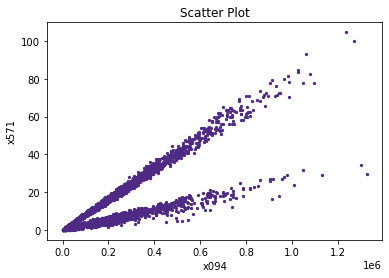

<Figure size 576x432 with 0 Axes>

In [70]:
# Create the scatter plot
plt.scatter(train['x094'], train['x571'], c='#4E2A84', s = 5)

# Add labels and title
plt.xlabel('x094')
plt.ylabel('x571')
plt.title('Scatter Plot')

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()

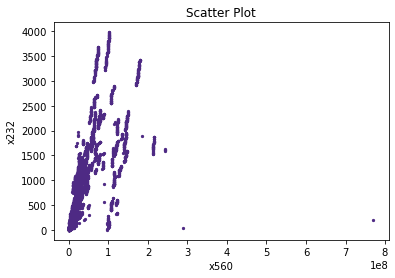

<Figure size 720x7200 with 0 Axes>

In [67]:
# Create the scatter plot
plt.scatter(train['x560'], train['x232'], c='#4E2A84', s = 5)

# Add labels and title
plt.xlabel('x560')
plt.ylabel('x232')
plt.title('Scatter Plot')

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()

In [34]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

len(to_drop)

<ipython-input-34-b73eb219422b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


580

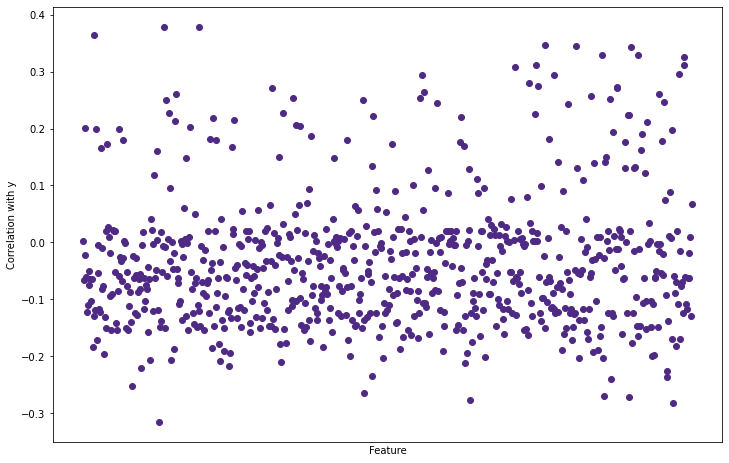

In [169]:
corr_y_plot = train.corr()['y']
corr_y_plot = corr_y_plot.drop(['id','y'])
corr_y_plot = corr_y_plot.to_frame().reset_index()

fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(corr_y_plot['index'],corr_y_plot['y'], color = "#4E2A84")
ax.set_xticks([])
ax.set_xticklabels([])
plt.xlabel('Feature')
plt.ylabel('Correlation with y')
plt.show()

In [202]:
counts1 = corr_1_abs.index.get_level_values(0).append(corr_1_abs.index.get_level_values(1)).value_counts()

corr_1_list = (counts1[counts1 >= 2].index.tolist())
corr_1_list.append('y')

In [171]:
corr_y_plot = train.corr()['y']
corr_y_plot = corr_y_plot.filter(corr_1_list)
corr_y_plot = corr_y_plot.to_frame().reset_index()
corr_y_plot = corr_y_plot.drop(corr_y_plot.index[-1])

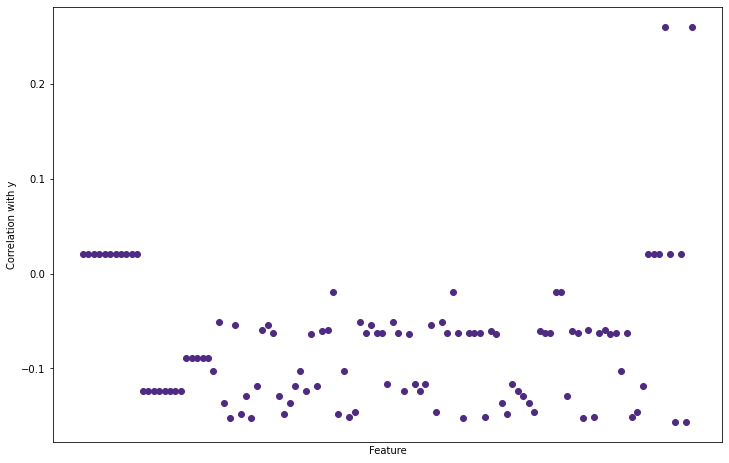

In [172]:
fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(corr_y_plot['index'],corr_y_plot['y'], color = "#4E2A84")
ax.set_xticks([])
ax.set_xticklabels([])
plt.xlabel('Feature')
plt.ylabel('Correlation with y')
plt.show()

In [181]:
# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)
train

,x001,x002,x003,x004,x005,x006,x007,x009,x013,x014,...,x700,x703,x707,x712,x727,x729,x734,x737,x750,y
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,14539.0,56.695,4.82,...,5710000000000000000,0,586885589994299981824,10.0295,0.00,4.27,2.0,1.35495,0.50,5
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1051272.0,95.000,4.00,...,1514431683883399926251520,0,5550000000000000000,NaN,0.09,4.27,8.0,-0.87106,0.50,1
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,144143.0,92.600,6.62,...,77223513438553997312,0,88897890482495995904,8.5580,0.00,3.68,7.0,1.39396,0.36,11
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,10055.0,92.130,5.60,...,178140452251780002086912,0,28732631875074998272,2.7726,0.00,4.23,6.0,1.34729,0.50,1
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,17914.0,94.550,2.43,...,824000000000000000,0,44666736442821001216,5.6557,0.90,4.15,16.0,1.46264,0.45,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,4439.0,80.000,10.88,...,28319569577120001687552,0,3970000000000000000,0.0000,0.00,4.52,7.0,1.15515,0.43,4
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,19106.0,97.760,5.40,...,14140125507943000965120,0,302089053432449990656,4.6825,0.00,4.61,4.0,1.31724,0.46,8
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,71514.0,94.940,4.58,...,5221551365565699850240,0,113673829679690006528,0.0000,0.00,3.87,8.0,1.31993,0.45,21
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,13977.0,101.510,5.68,...,452000000000000000,0,59483907779766001664,4.6474,0.00,4.01,2.0,1.30878,0.39,13


In [229]:
train

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47,13


In [300]:
# Count the number of times each variable appears in the filtered correlations
counts1 = corr_1_abs.index.get_level_values(0).append(corr_1_abs.index.get_level_values(1)).value_counts()

corr_1_list = (counts1[counts1 >= 2].index.tolist())
# Print the variables that appear at least twice
print(corr_1_list)

['x547', 'x339', 'x470', 'x464', 'x673', 'x686', 'x206', 'x040', 'x210', 'x565', 'x372', 'x690', 'x489', 'x663', 'x659', 'x618', 'x382', 'x066', 'x139', 'x152', 'x397', 'x491', 'x170', 'x441', 'x214', 'x539', 'x340', 'x471', 'x439', 'x650', 'x130', 'x479', 'x095', 'x046', 'x019', 'x120', 'x495', 'x615', 'x285', 'x204', 'x492', 'x682', 'x084', 'x450', 'x544', 'x403', 'x115', 'x144', 'x011', 'x352', 'x237', 'x550', 'x143', 'x277', 'x213', 'x493', 'x078', 'x608', 'x678', 'x754', 'x012', 'x613', 'x593', 'x592', 'x621', 'x455', 'x042', 'x442', 'x034', 'x760', 'x279', 'x091', 'x351', 'x546', 'x179', 'x433', 'x071', 'x176', 'x715', 'x628', 'x424', 'x482', 'x629', 'x148', 'x393', 'x762', 'x182', 'x761', 'x297', 'x418', 'x573', 'x705', 'x058', 'x381', 'x055', 'x065', 'x743', 'x278', 'x171', 'x123', 'x313', 'x224', 'x377', 'x384', 'x029', 'x230', 'x458', 'x724', 'x747', 'x633', 'x459', 'x083', 'x118']


In [301]:
print(len(corr_1_list))

113


In [230]:
# Count the number of times each variable appears in the filtered correlations
counts07 = corr_07_abs.index.get_level_values(0).append(corr_07_abs.index.get_level_values(1)).value_counts()

corr_07_list = counts07[counts07 >= 2].index.tolist()
# Print the variables that appear at least twice
print(corr_07_list)

['x356', 'x094', 'x155', 'x367', 'x462', 'x446', 'x038', 'x440', 'x533', 'x260', 'x088', 'x523', 'x525', 'x649', 'x220', 'x231', 'x631', 'x041', 'x460', 'x411', 'x570', 'x674', 'x566', 'x222', 'x087', 'x398', 'x401', 'x747', 'x513', 'x426', 'x501', 'x459', 'x271', 'x371', 'x608', 'x029', 'x175', 'x458', 'x319', 'x539', 'x159', 'x042', 'x230', 'x550', 'x245', 'x149', 'x261', 'x107', 'x763', 'x129', 'x412', 'x653', 'x722', 'x368', 'x681', 'x346', 'x252', 'x330', 'x112', 'x666', 'x218', 'x558', 'x126', 'x536', 'x698', 'x726', 'x531', 'x226', 'x325', 'x033', 'x322', 'x198', 'x571', 'x341', 'x020', 'x054', 'x213', 'x493', 'x171', 'x091', 'x233', 'x547', 'x040', 'x372', 'x464', 'x210', 'x339', 'x565', 'x686', 'x673', 'x470', 'x206', 'x505', 'x394', 'x376', 'x283', 'x445', 'x517', 'x019', 'x277', 'x621', 'x439', 'x383', 'x101', 'x381', 'x046', 'x743', 'x403', 'x281', 'x761', 'x115', 'x034', 'x297', 'x104', 'x254', 'x235', 'x557', 'x242', 'x520', 'x030', 'x021', 'x580', 'x276', 'x358', 'x370',

In [231]:
len(corr_07_list)

687

In [ ]:
comparison_set = set(corr_1_list) & set(corr_07_list)

# Print the common values
common_features = []
for features in comparison_set:
    common_features.append(features)

In [ ]:
len(common_features)

In [302]:
corr_less_07_abs = sorted_corr_abs[(sorted_corr_abs < 0.7)]

In [303]:
# Count the number of times each variable appears in the filtered correlations
counts_less_07 = corr_less_07_abs.index.get_level_values(0).append(corr_less_07_abs.index.get_level_values(1)).value_counts()

corr_less_07_list = counts_less_07[counts_less_07 >= 1].index
# Print the variables that appear at least twice
print(corr_less_07_list)

Index(['x712', 'x141', 'x075', 'x392', 'x360', 'x298', 'x532', 'x400', 'x461',
       'x191',
       ...
       'x440', 'x462', 'x038', 'x260', 'x533', 'x088', 'x367', 'x155', 'x094',
       'x356'],
      dtype='object', length=745)


In [304]:
features = [value for value in corr_less_07_list if value not in corr_1_list]
print(features)

['x712', 'x141', 'x075', 'x392', 'x360', 'x298', 'x532', 'x400', 'x461', 'x191', 'x419', 'x467', 'x142', 'x469', 'x626', 'x434', 'x402', 'x552', 'x516', 'x076', 'x428', 'x389', 'x053', 'x466', 'x025', 'x051', 'x694', 'x729', 'x604', 'x526', 'x098', 'x329', 'x059', 'y', 'x359', 'x737', 'x519', 'x190', 'id', 'x127', 'x045', 'x660', 'x247', 'x595', 'x672', 'x111', 'x236', 'x124', 'x514', 'x103', 'x241', 'x132', 'x173', 'x343', 'x324', 'x080', 'x658', 'x584', 'x036', 'x639', 'x305', 'x711', 'x675', 'x217', 'x275', 'x399', 'x611', 'x502', 'x221', 'x620', 'x727', 'x623', 'x541', 'x527', 'x449', 'x677', 'x508', 'x316', 'x309', 'x717', 'x452', 'x318', 'x077', 'x587', 'x637', 'x061', 'x657', 'x110', 'x347', 'x361', 'x081', 'x699', 'x451', 'x086', 'x599', 'x473', 'x357', 'x024', 'x483', 'x436', 'x257', 'x006', 'x251', 'x632', 'x457', 'x312', 'x600', 'x444', 'x577', 'x443', 'x317', 'x311', 'x497', 'x291', 'x745', 'x671', 'x068', 'x537', 'x032', 'x408', 'x617', 'x258', 'x208', 'x732', 'x583', 'x16

In [305]:
features = pd.Series(features).drop_duplicates().tolist()
features

['x712',
 'x141',
 'x075',
 'x392',
 'x360',
 'x298',
 'x532',
 'x400',
 'x461',
 'x191',
 'x419',
 'x467',
 'x142',
 'x469',
 'x626',
 'x434',
 'x402',
 'x552',
 'x516',
 'x076',
 'x428',
 'x389',
 'x053',
 'x466',
 'x025',
 'x051',
 'x694',
 'x729',
 'x604',
 'x526',
 'x098',
 'x329',
 'x059',
 'y',
 'x359',
 'x737',
 'x519',
 'x190',
 'id',
 'x127',
 'x045',
 'x660',
 'x247',
 'x595',
 'x672',
 'x111',
 'x236',
 'x124',
 'x514',
 'x103',
 'x241',
 'x132',
 'x173',
 'x343',
 'x324',
 'x080',
 'x658',
 'x584',
 'x036',
 'x639',
 'x305',
 'x711',
 'x675',
 'x217',
 'x275',
 'x399',
 'x611',
 'x502',
 'x221',
 'x620',
 'x727',
 'x623',
 'x541',
 'x527',
 'x449',
 'x677',
 'x508',
 'x316',
 'x309',
 'x717',
 'x452',
 'x318',
 'x077',
 'x587',
 'x637',
 'x061',
 'x657',
 'x110',
 'x347',
 'x361',
 'x081',
 'x699',
 'x451',
 'x086',
 'x599',
 'x473',
 'x357',
 'x024',
 'x483',
 'x436',
 'x257',
 'x006',
 'x251',
 'x632',
 'x457',
 'x312',
 'x600',
 'x444',
 'x577',
 'x443',
 'x317',
 'x311

In [306]:
len(features)

632

In [307]:
train = train[train.columns.intersection(features)]

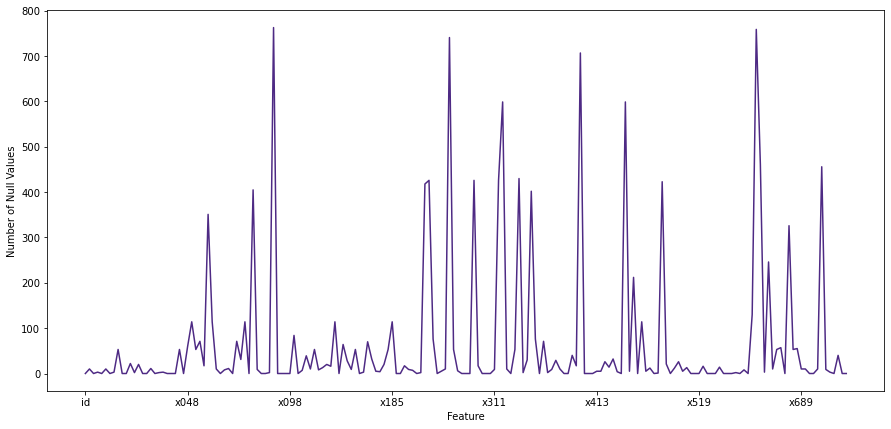

In [36]:
null_counts = train.isnull().sum()
null_counts.plot(kind='line', figsize = (15,7), color = "#4E2A84")
plt.xlabel('Feature')
plt.ylabel('Number of Null Values')
plt.show()

In [308]:
# Remove columns with more than 250 missing values

train = train.loc[:, train.isnull().sum() < 250]

In [309]:
train

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x752,x753,x755,x756,x757,x758,x759,x763,x764,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.02,150.68,3.37,1.5707,0.0007,297281012,0.13,8.5127,14.28,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.02,128.73,2.40,0.1173,0.1136,3320000000000,0.08,1.5700,160.12,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,-0.13,110.56,6.67,0.4582,0.0029,100474819,0.39,9.6800,25.06,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.03,127.61,7.40,0.3816,0.0000,348000000000,0.25,4.5316,117.76,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.04,130.48,1.14,0.0100,0.0005,109546590,0.11,16.2717,5.81,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.03,127.57,15.10,1.3758,0.0000,158603315,0.05,2.7480,93.45,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.08,127.09,4.38,0.2230,0.0003,36089167,0.01,23.6890,76.05,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.07,153.06,1.87,0.1300,0.0057,1786891,0.53,4.3710,80.30,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,-0.04,120.57,7.51,0.2719,0.0001,194000000000,0.29,24.6594,7.95,13


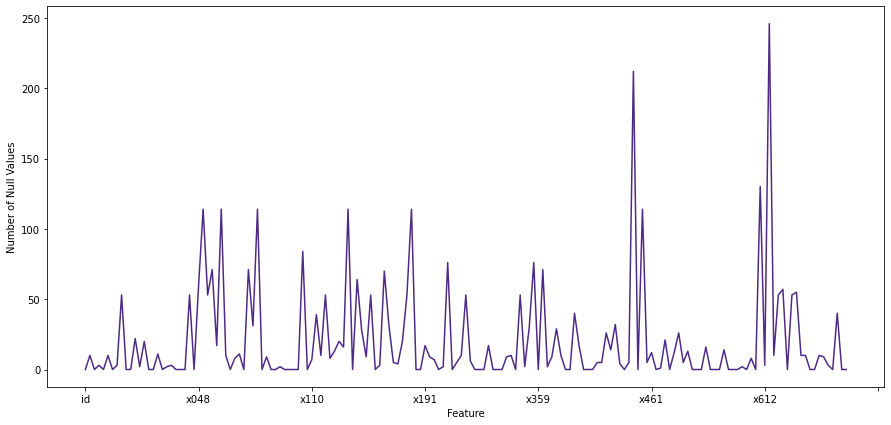

In [40]:
null_counts = train.isnull().sum()
null_counts.plot(kind='line', figsize = (15,7), color = "#4E2A84")
plt.xlabel('Feature')
plt.ylabel('Number of Null Values')
plt.show()

In [310]:
# Create X and y datasets to train the model

train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

In [44]:
features_final = list(set(train.columns))
features_final.remove('y')

In [45]:
X = X[features_final]

In [46]:
Xtest = test[features_final]

In [ ]:
#Xtest = test[features_final]
Xtest = test.drop(columns = 'id')

In [215]:
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

Xtest_imp = pd.DataFrame(imputer.fit_transform(Xtest),columns = Xtest.columns)

In [ ]:
sc = StandardScaler()

sc.fit(X)
X_scaled = sc.transform(X)
Xtest_scaled_imp = sc.transform(Xtest_imp)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns= X.columns)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns= Xtest.columns)

In [51]:
model = Earth(max_terms=500, max_degree=1) # note, terms in brackets are the hyperparameters
model.fit(X,y)

C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\rolfe\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(max_degree=1, max_terms=500)

In [53]:
#Predicted values
pred = model.predict(Xtest_imp)
pred

array([10.43769867, 11.02790645, 10.97347145, ..., 10.54073553,
       11.03309513, 11.03368787])

In [ ]:
len(pred)

In [54]:
predictions_regression = pd.DataFrame({"id" : test.id, "y": pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)

In [273]:
train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

In [311]:
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

In [312]:
sc = StandardScaler()

sc.fit(X)
X_scaled = sc.transform(X)

In [313]:
pca = PCA()
pca.fit(X_scaled)

PCA()

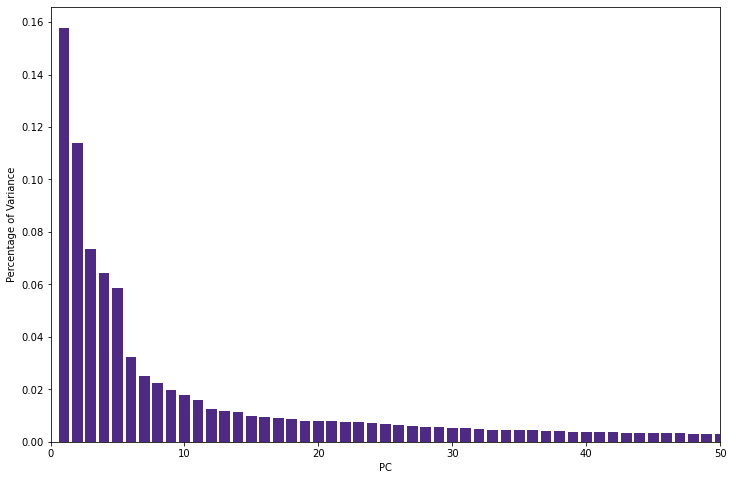

In [326]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color = "#4E2A84")
plt.xlabel('PC')
plt.ylabel('Percentage of Variance')
plt.xlim(0,50)
plt.show()

In [198]:
X

,x001,x002,x003,x004,x005,x006,x007,x009,x013,x014,...,x689,x694,x700,x703,x707,x727,x729,x734,x737,x750
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,14539.0,56.695,4.82,...,2.698472e+40,0.620862,5.710000e+18,0.0,5.868856e+20,0.00,4.27,2.0,1.35495,0.50
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1051272.0,95.000,4.00,...,1.637550e+37,-0.289669,1.514432e+24,0.0,5.550000e+18,0.09,4.27,8.0,-0.87106,0.50
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,144143.0,92.600,6.62,...,8.962143e+38,0.471359,7.722351e+19,0.0,8.889789e+19,0.00,3.68,7.0,1.39396,0.36
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,10055.0,92.130,5.60,...,1.573669e+38,0.779931,1.781405e+23,0.0,2.873263e+19,0.00,4.23,6.0,1.34729,0.50
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,17914.0,94.550,2.43,...,1.053288e+38,0.617454,8.240000e+17,0.0,4.466674e+19,0.90,4.15,16.0,1.46264,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,4439.0,80.000,10.88,...,4.191467e+36,-1.042866,2.831957e+22,0.0,3.970000e+18,0.00,4.52,7.0,1.15515,0.43
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,19106.0,97.760,5.40,...,3.644168e+39,-0.746450,1.414013e+22,0.0,3.020891e+20,0.00,4.61,4.0,1.31724,0.46
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,71514.0,94.940,4.58,...,2.283664e+39,0.825979,5.221551e+21,0.0,1.136738e+20,0.00,3.87,8.0,1.31993,0.45
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,13977.0,101.510,5.68,...,1.225853e+38,-0.629057,4.520000e+17,0.0,5.948391e+19,0.00,4.01,2.0,1.30878,0.39
